Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин. Образцы предварительно обрабатываются с помощью акустического анализа на языке программирования R с использованием специальных библиотек в диапазоне частот 0 Гц-280 Гц (диапазон человеческого голоса). Если вкратце, в результате обработки звук на аудиозаписи оцифровывается и преобразуется в числовую последовательность частот, из которой извлекаются различные статистические характеристики, например средняя частота, с которой говорит спикер на аудиозаписи, или частота с наибольшей энергией и так далее.

- meanfreq — средняя частота голоса спикера (в кГц);
- sd — стандартное отклонение частоты (в кГц);
- median — медианная частота (в кГц);
- Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
- Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
- IQR — межквартильный размах (Q75-Q25) (в кГц);
- skew — асимметрия распределения частот;
- kurt — эксцесс распределения частот;
- sp.ent — спектральная энтропия;
- sfm — спектральная равномерность;
- ode — модальная частота (наиболее популярная частота голоса);
- centroid — частотный центроид;
- peakf — пиковая частота (частота с наибольшей энергией);
- meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
- minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
- maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
- meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
- mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
- modindx — индекс модуляции;
- label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

Итак, приступаем к работе. Прочитаем наши данные:

In [3]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Посмотрим на типизацию признаков:

In [5]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Итак, все признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке sklearn, поэтому кодирование категориальных признаков нам не потребуется.

Заодно проверим данные на наличие пропусков:

In [6]:
voice_data.isnull().sum().sum()
# 0

np.int64(0)

Разделим датасет на две части в соотношении 80/20:

In [8]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']


# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


Дополнительная предобработка данных нам не потребуется, поэтому мы можем смело перейти к построению моделей. Для моделирования мы, конечно же, будем использовать модели «древесного» типа.

Задание 7.1

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. На основе какого фактора будет построено решающее правило в корневой вершине?

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


In [11]:
# Создаём дерево решений
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

# Обучаем модель
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

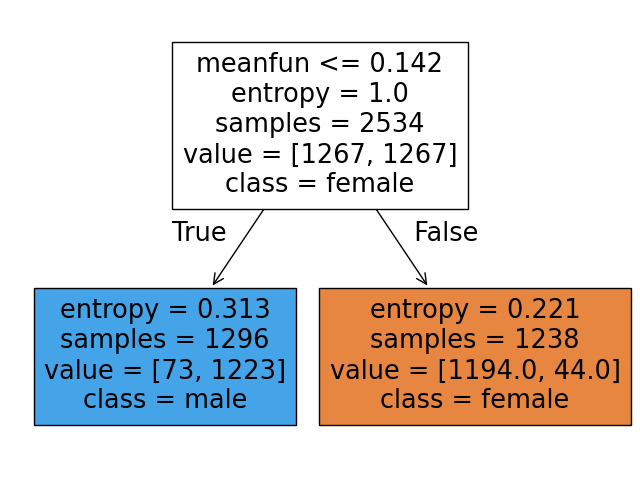

In [12]:
# Визуализация дерева
plt.figure(figsize=(8, 6))
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=decision_tree.classes_, filled=True)
plt.show()


In [13]:
# Определяем признак с максимальной информативностью
feature_index = decision_tree.tree_.feature[0]
print(f"Решающее правило основано на признаке: {X_train.columns[feature_index]}")


Решающее правило основано на признаке: meanfun


2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.

In [14]:
# Извлекаем пороговое значение
threshold = decision_tree.tree_.threshold[0]
print(f"Оптимальное пороговое значение для признака meanfun: {threshold:.3f}")


Оптимальное пороговое значение для признака meanfun: 0.142


3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.

In [15]:
condition_met = X_train['meanfun'] <= decision_tree.tree_.threshold[0]
count_condition_met = condition_met.sum()

percentage = (count_condition_met / len(X_train)) * 100
print(f"{percentage:.1f}")


51.1


4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [16]:
# Получаем предсказания
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

# Рассчитываем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.956


Задание 7.2

Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:

In [17]:
# Создаём дерево решений с максимальной глубиной 2
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

# Обучаем модель на тренировочной выборке
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

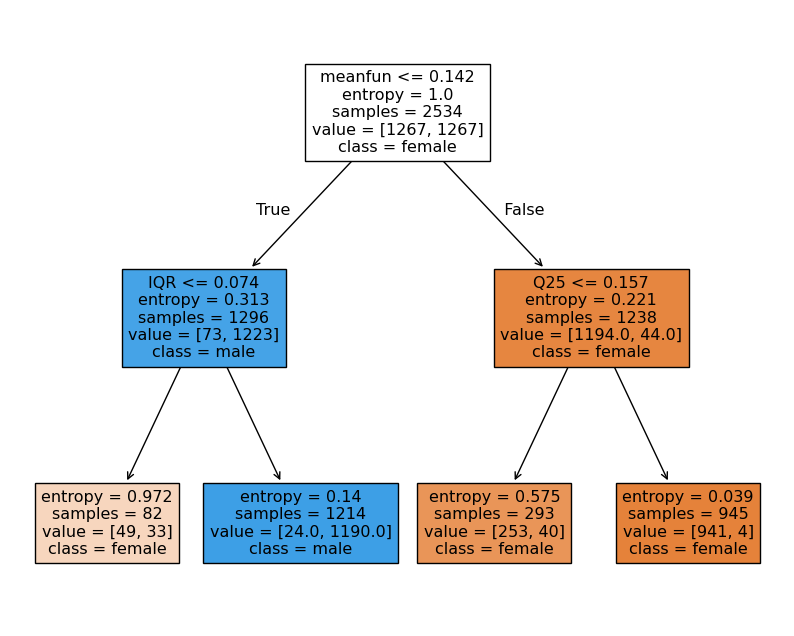

In [18]:
# Визуализация дерева решений
plt.figure(figsize=(10, 8))
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=decision_tree.classes_, filled=True)
plt.show()


In [19]:
used_features = decision_tree.tree_.feature
used_factors = [X_train.columns[i] for i in used_features if i != -2]  # Исключаем узлы без признаков
print(f"Факторы, использованные при построении дерева: {used_factors}")


Факторы, использованные при построении дерева: ['meanfun', 'IQR', 'Q25']


2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female? Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции plot_tree(), укажите параметр class_names=dt.classes_.

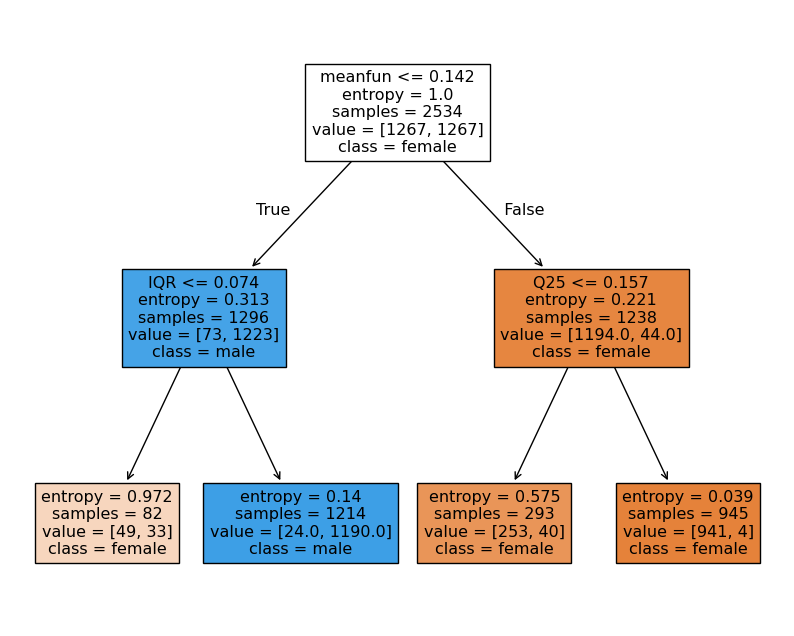

In [20]:
plt.figure(figsize=(10, 8))
tree.plot_tree(
    decision_tree,
    feature_names=X_train.columns,
    class_names=decision_tree.classes_,
    filled=True
)
plt.show()


In [21]:
# Определение листьев
is_leaf = decision_tree.tree_.children_left == -1  # Проверяем, является ли узел листом

# Выбираем индексы узлов, которые являются листьями
leaf_indices = [i for i, leaf in enumerate(is_leaf) if leaf]

# Считаем листья, предсказывающие класс 'female'
class_index = list(decision_tree.classes_).index('female')  # Индекс класса 'female'
female_leaf_count = sum(
    decision_tree.tree_.value[i][0].argmax() == class_index  # Проверяем, предсказание = 'female'
    for i in leaf_indices
)
print(f"Количество листьев с классом 'female': {female_leaf_count}")


Количество листьев с классом 'female': 3


3. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [22]:
# Получаем предсказания
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import accuracy_score

# Рассчитываем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.962


Задание 7.3

Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода get_depth().

In [23]:
# Создаём дерево решений без ограничения глубины
decision_tree_full = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Обучаем дерево на тренировочной выборке
decision_tree_full.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
# Определяем глубину дерева
tree_depth = decision_tree_full.get_depth()
print(f"Глубина построенного дерева: {tree_depth}")


Глубина построенного дерева: 12


2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода get_n_leaves().

In [25]:
# Получаем количество листьев
num_leaves = decision_tree_full.get_n_leaves()
print(f"Количество листьев в дереве решений: {num_leaves}")


Количество листьев в дереве решений: 54


3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [26]:
# Предсказания для обучающей выборки
y_train_pred = decision_tree_full.predict(X_train)
# Предсказания для тестовой выборки
y_test_pred = decision_tree_full.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score

# Accuracy для обучающей выборки
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy для тестовой выборки
test_accuracy = accuracy_score(y_test, y_test_pred)

# Вывод результата с округлением до трёх знаков
print(f"Accuracy на обучающей выборке: {train_accuracy:.3f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.3f}")


Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.973


Задание 7.4

Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:

In [28]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):

In [29]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

1. Какой критерий информативности использует наилучшая модель?

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


In [32]:
# Создаём объект дерева решений
decision_tree = DecisionTreeClassifier(random_state=0)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=cv, 
    n_jobs=-1  # Использовать все доступные процессоры
)

# Выполняем подбор гиперпараметров на обучающей выборке
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [33]:
best_params = grid_search.best_params_
print(f"Критерий информативности наилучшей модели: {best_params['criterion']}")


Критерий информативности наилучшей модели: gini


2. Чему равна оптимальная максимальная глубина?

In [34]:
# Получение оптимальных параметров
best_params = grid_search.best_params_
print(f"Оптимальная максимальная глубина: {best_params['max_depth']}")


Оптимальная максимальная глубина: 7


3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?

In [35]:
# Получение оптимальных параметров
best_params = grid_search.best_params_
print(f"Оптимальное минимальное количество объектов для разбиения: {best_params['min_samples_split']}")


Оптимальное минимальное количество объектов для разбиения: 3


4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [36]:
# Предсказание для обучающей выборки
y_train_pred = grid_search.best_estimator_.predict(X_train)

# Предсказание для тестовой выборки
y_test_pred = grid_search.best_estimator_.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score

# Accuracy для обучающей выборки
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy для тестовой выборки
test_accuracy = accuracy_score(y_test, y_test_pred)

# Вывод результатов с округлением до трёх знаков после точки-разделителя
print(f"Accuracy на обучающей выборке: {train_accuracy:.3f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.3f}")


Accuracy на обучающей выборке: 0.996
Accuracy на тестовой выборке: 0.970


Задание 7.5

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Извлекаем важности признаков
feature_importances = grid_search.best_estimator_.feature_importances_

# Создаём DataFrame для удобства
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


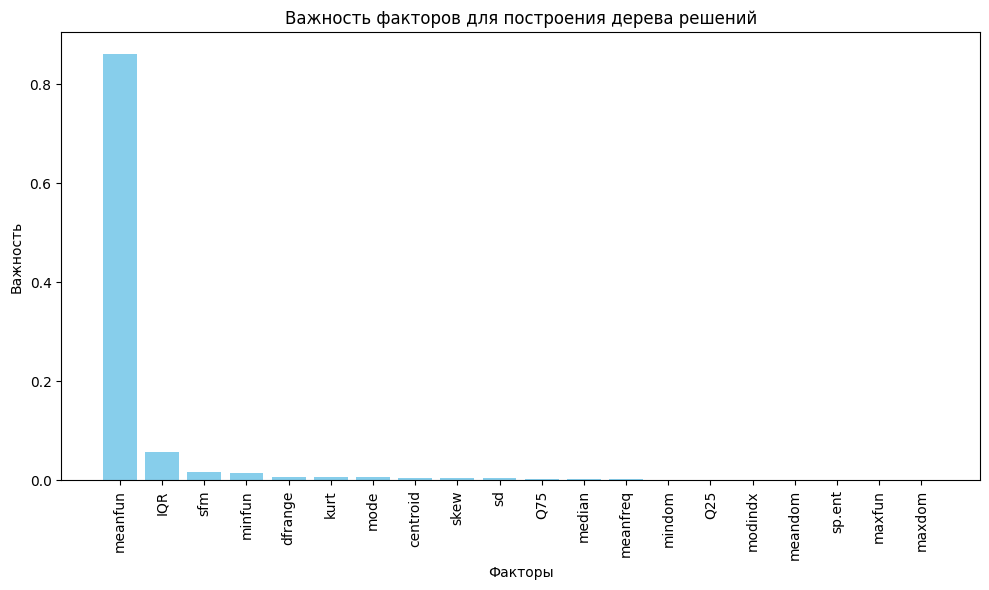

In [39]:
# Визуализация значимости факторов
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Факторы')
plt.ylabel('Важность')
plt.title('Важность факторов для построения дерева решений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [40]:
top_3_features = importance_df.head(3)['Feature'].tolist()
print(f"Топ-3 наиболее важных факторов: {top_3_features}")


Топ-3 наиболее важных факторов: ['meanfun', 'IQR', 'sfm']
